In [12]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# scaling and train test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# creating a model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation ,Dropout , Flatten
from tensorflow.keras.optimizers import Adam

# evaluation on test data
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory


#  CIFAR-10 Veri Setinin Yapısı

* Eğitim seti (x_train): 50,000 resim, her biri 32x32 piksel, 3 kanal (RGB)
* Test seti (x_test): 10,000 resim, her biri 32x32 piksel, 3 kanal (RGB)
* y_train ve y_test etiketleridir. Her etiket, resmin hangi sınıfa ait olduğunu belirtir.

In [13]:
# CIFAR-10 veri setini yükle
from tensorflow.keras.datasets import cifar10


(x_train, y_train), (x_test, y_test) = cifar10.load_data()



In [14]:
# Veri seti hakkında bilgi ver
print("Eğitim seti boyutu:", x_train.shape)
print("Test seti boyutu:", x_test.shape)

Eğitim seti boyutu: (50000, 32, 32, 3)
Test seti boyutu: (10000, 32, 32, 3)


# CIFAR-10'un Sınıfları
* CIFAR-10 veri setinde 10 farklı sınıf bulunur. Sınıfların listesi aşağıdaki gibi sıralanabilir:

In [15]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


print(f"Sınıf sayısı: {len(class_names)}")
print("Sınıf isimleri:", class_names)

Sınıf sayısı: 10
Sınıf isimleri: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


# MODELİ EĞİTMEYE GEÇELİM

* Önce Veri Ölçeklendirme

In [16]:
x_train = x_train/255
x_test = x_test/255

In [17]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train,num_classes=10 )
y_test = to_categorical(y_test , num_classes=10)

# İnput Shape Neye Göre Belirlenir

* Her veri setinin kendine özgü bir görüntü boyutu olabilir. Bunu belirlemek için:

In [40]:
'''
import numpy as np
from tensorflow.keras.datasets import cifar10

# Veri setini yükle
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# İlk resmin boyutunu yazdır
print("Bir resmin boyutu:", x_train[0].shape)

'''

'\nimport numpy as np\nfrom tensorflow.keras.datasets import cifar10\n\n# Veri setini yükle\n(x_train, y_train), (x_test, y_test) = cifar10.load_data()\n\n# İlk resmin boyutunu yazdır\nprint("Bir resmin boyutu:", x_train[0].shape)\n\n'

Yapay sinir ağlarında, giriş katmanına giren verinin sabit bir boyutta olması gerekir. Bu yüzden farklı boyutlardaki resimleri aynı boyuta ölçeklendirmek (resize) zorundayız.

💡 CNN Modellerinde Yaygın Kullanılan Görsel Boyutları:

* CIFAR-10 → 32x32
* MNIST → 28x28 (Gri ölçekli)
* ImageNet → 224x224

Kendi veri setin → Modelin kapasitesine göre 64x64, 128x128, 256x256 vb.

Eğer farklı boyuttaki resimler kullanıyorsan, bunları yeniden boyutlandırman (resize) gerekir.

In [41]:
model = Sequential([
    Flatten(input_shape=(32,32,3)),
    Dense(256 , activation="relu"),
    Dense(128 , activation="relu"),
    Dense(64 , activation="relu"),
    Dense(10 , activation="softmax"),
    ])

C:\Users\hdgn5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [42]:
model.compile(optimizer="adam" , loss="categorical_crossentropy",metrics=["accuracy"])

In [18]:
print("Eğitim seti boyutu:", x_train.shape)
print("Test seti boyutu:", x_test.shape)

Eğitim seti boyutu: (50000, 32, 32, 3)
Test seti boyutu: (10000, 32, 32, 3)


* Veri shapeleri doğru mu diye kontrol edelim

In [19]:
print("Eğitim seti boyutu:", y_train.shape)
print("Test seti boyutu:", y_test.shape)

Eğitim seti boyutu: (50000, 10)
Test seti boyutu: (10000, 10)


In [45]:
fit = model.fit(x_train,y_train , epochs=30 , batch_size=64)

Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.2759 - loss: 1.9915
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.3892 - loss: 1.6986
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.4198 - loss: 1.6100
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.4405 - loss: 1.5610
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.4550 - loss: 1.5147
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.4734 - loss: 1.4811
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.4748 - loss: 1.4629
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.4891 - loss: 1.4309
Epoch 9/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5036 - loss: 1.3943
Epoch 10/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5019 - loss: 1.3915
Epoch 11/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.5186 - loss: 1.3544
Epoch 12/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step

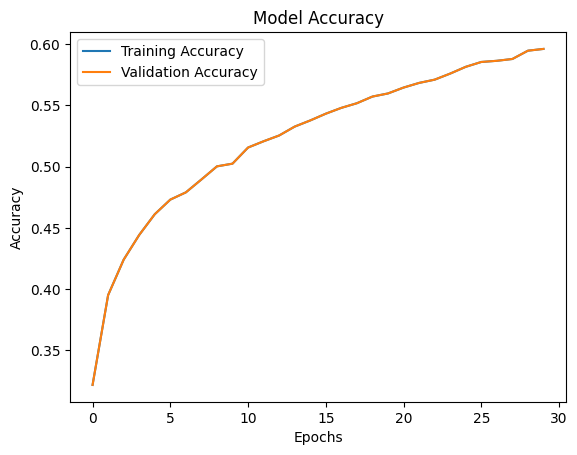

In [46]:
# Doğruluk grafiği
plt.plot(fit.history['accuracy'], label='Training Accuracy')
plt.plot(fit.history['accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [47]:
pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [48]:
prediction =np.argmax(pred , axis=1)

In [49]:
accuracy = np.argmax(y_test , axis=1)

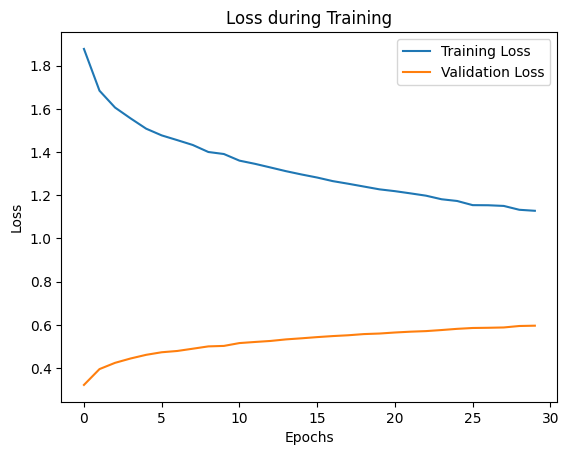

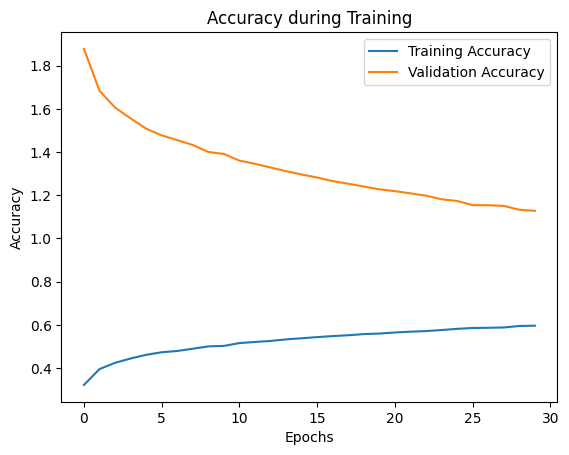

In [50]:


# Kayıp grafiği
plt.plot(fit.history['loss'], label='Training Loss')
plt.plot(fit.history['accuracy'], label='Validation Loss')
plt.title('Loss during Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Doğruluk grafiği
plt.plot(fit.history['accuracy'], label='Training Accuracy')
plt.plot(fit.history['loss'], label='Validation Accuracy')
plt.title('Accuracy during Training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [51]:
from sklearn.metrics import classification_report, confusion_matrix

In [52]:
print("Confusion Matrix:")
print(confusion_matrix(accuracy, prediction))

Confusion Matrix:
[[545  61  49  23  44  23  19  35 169  32]
 [ 35 679  14  17  14  15  14  23  63 126]
 [ 75  35 368  65 142  80 113  58  40  24]
 [ 23  33 105 277  95 191 140  57  39  40]
 [ 41  16 130  53 492  42 114  64  39   9]
 [ 20  19  89 165 103 396  86  64  31  27]
 [ 14  29  82  83 124  43 578  10  20  17]
 [ 34  23  70  59 124  75  30 518  25  42]
 [ 84  81  14  13  31  11   6  21 689  50]
 [ 44 233  12  27  10  22  27  51  78 496]]


In [53]:
print(classification_report(accuracy , prediction))


              precision    recall  f1-score   support

           0       0.60      0.55      0.57      1000
           1       0.56      0.68      0.61      1000
           2       0.39      0.37      0.38      1000
           3       0.35      0.28      0.31      1000
           4       0.42      0.49      0.45      1000
           5       0.44      0.40      0.42      1000
           6       0.51      0.58      0.54      1000
           7       0.57      0.52      0.54      1000
           8       0.58      0.69      0.63      1000
           9       0.57      0.50      0.53      1000

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.50      0.50      0.50     10000



# MODELİ DAHA İYİ HALE GETİRELİM


In [20]:
from tensorflow.keras.layers import BatchNormalization

model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(512, activation="relu"),
    BatchNormalization(),
    Dense(256, activation="relu"),
    BatchNormalization(),
    Dense(128, activation="relu"),
    Dense(10, activation="softmax")
])


In [21]:
model.compile(optimizer=Adam(learning_rate=0.001), loss="categorical_crossentropy" , metrics=["accuracy"])

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(x_train)


Veri augmentasyonu, eğitim verisinde yapay olarak çeşitlilik oluşturup modelin daha genel öğrenmesini sağlar, yani daha fazla çeşitlilikle eğitim yapılmasını sağlar.

1. rotation_range=20:
Bu parametre, görüntülerin rastgele döndürülmesine olanak tanır. Burada 20 değeri, görüntülerin 20 dereceye kadar dönebilmesi anlamına gelir. Bu, modelin nesneleri farklı açılarda da tanıyabilmesini sağlar.

2. width_shift_range=0.2:
Bu parametre, görüntülerin yatayda (%20'ye kadar) kaymasına izin verir. Yani, resmin yatayda sağa veya sola kaydırılmasını sağlar. Bu, modelin nesneleri farklı konumlarda da tanıyabilmesini sağlar.

3. height_shift_range=0.2:
Bu, görüntülerin dikeyde (%20'ye kadar) kaymasına olanak tanır. Görüntü, yukarı veya aşağıya kaydırılabilir. Bu da, modelin nesneleri farklı yüksekliklerde tanıyabilmesini sağlar.

4. shear_range=0.2:
Bu parametre, görüntülerin "shear" (deformasyon) işlemi ile eğilmesini sağlar. Yani, resim belirli bir açıyla eğilebilir. Bu, modelin deformasyona uğramış nesneleri de öğrenmesini sağlar.

5. zoom_range=0.2:
Bu parametre, görüntüleri rastgele büyütme (zoom in) veya küçültme (zoom out) işlemi yapar. %20 değeri, görüntünün %80 ile %120 arasında bir büyüklüğe getirilmesi anlamına gelir. Bu, modelin nesneleri farklı boyutlarda tanıyabilmesini sağlar.

6. horizontal_flip=True:
Bu parametre, görüntülerin yatayda rastgele çevrilmesine (tersine döndürülmesine) olanak tanır. Bu, özellikle simetrik nesneleri tanıma yeteneğini artırır.

7. fill_mode='nearest':
Bu parametre, dönüşüm sırasında oluşabilecek boş alanların nasıl doldurulacağını belirler. nearest yöntemi, boş kalan alanları en yakın piksel değeriyle doldurur. Bu, dönüşüm sırasında kaybolan piksellerin yerine doğru değerlerin yerleştirilmesine yardımcı olur.

Özetle:
Bu parametreler, ImageDataGenerator'ın uygulayabileceği çeşitli veri augmentasyonu dönüşümleridir. Amacı, eğitim verisinin çeşitlendirilmesi ve böylece modelin daha sağlam ve genel öğrenmesidir.

In [23]:

fit = model.fit(x_train, y_train, epochs=32, batch_size=64, validation_data=(x_test, y_test))


Epoch 1/32
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 18ms/step - accuracy: 0.3549 - loss: 1.8269 - val_accuracy: 0.3469 - val_loss: 1.8720
Epoch 2/32
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.4592 - loss: 1.5206 - val_accuracy: 0.2924 - val_loss: 2.1086
Epoch 3/32
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.4865 - loss: 1.4413 - val_accuracy: 0.4188 - val_loss: 1.6227
Epoch 4/32
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.5211 - loss: 1.3448 - val_accuracy: 0.4196 - val_loss: 1.6380
Epoch 5/32
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.5410 - loss: 1.2975 - val_accuracy: 0.4915 - val_loss: 1.4389
Epoch 6/32
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.5584 - loss: 1.2455 - val_accuracy: 0.4885 - val_loss: 1.4633
Epoch 7/32
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.5718 - loss: 1.2045 - val_accuracy: 0.4979 - val_loss: 1.4466
Epoch 8/32
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.5849 - loss: 1.1713 - 

# YUKARIDA YAZAN 782 NE ANLAMA GELİYOR ?

CIFAR-10 eğitim seti toplam 50,000 görüntüden oluşuyor.

Batch size = 64

Toplam batch sayısı şu şekilde hesaplanır:


* * * (TOPLAM VERİ SAYISI) / (BATCH SAYISI) 

=> 
50,000/ 64

​
 ≈781.25

# Val_loss ve Val_accuracy için neden farklı batch sayısı var?
Test setinde 10,000 görüntü var.
Bu yüzden batch sayısı:

10.000 / 64
​
 = 156.25 ≈ 157

Validation seti için batch sayısı 157 olacak.

📌 Özetle

782 → Eğitim veri setinin batch sayısı.

Batch sayısı, veri seti büyüklüğüne ve batch_size’a göre belirlenir.

Validation setinde batch sayısı farklı olabilir.

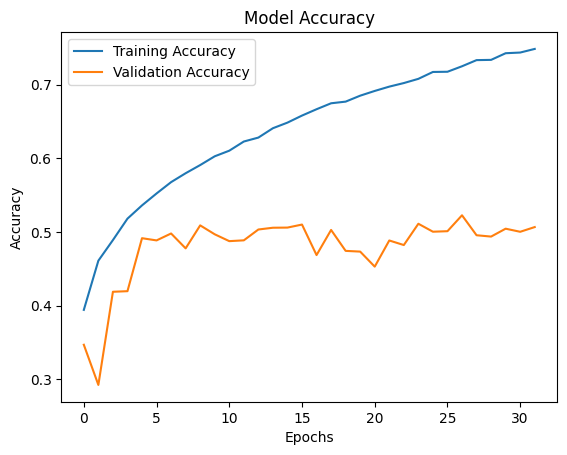

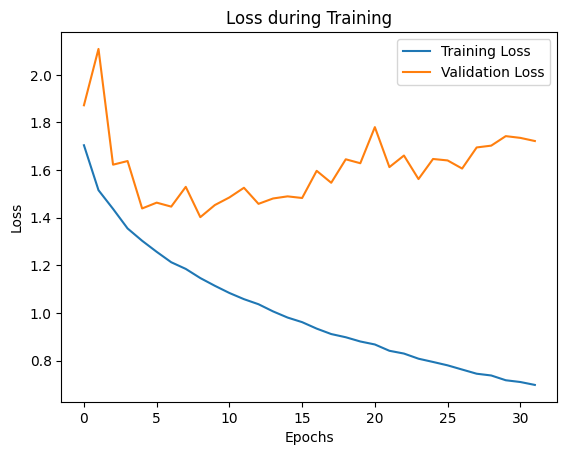

In [24]:
# Doğruluk grafiği
plt.plot(fit.history['accuracy'], label='Training Accuracy')
plt.plot(fit.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Kayıp grafiği
plt.plot(fit.history['loss'], label='Training Loss')
plt.plot(fit.history['val_loss'], label='Validation Loss')
plt.title('Loss during Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [25]:
pred = model.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [26]:
pred_value = np.argmax(pred,axis=1)
accuracy_value = np.argmax(y_test,axis=1)

In [27]:
print(classification_report(accuracy_value, pred_value))


              precision    recall  f1-score   support

           0       0.58      0.57      0.58      1000
           1       0.58      0.61      0.60      1000
           2       0.42      0.43      0.43      1000
           3       0.37      0.27      0.31      1000
           4       0.44      0.46      0.45      1000
           5       0.39      0.49      0.43      1000
           6       0.52      0.58      0.55      1000
           7       0.58      0.55      0.56      1000
           8       0.69      0.54      0.61      1000
           9       0.53      0.56      0.54      1000

    accuracy                           0.51     10000
   macro avg       0.51      0.51      0.51     10000
weighted avg       0.51      0.51      0.51     10000



* Daha iyi yapalım derken... O kadar da eğitmiştik :) Peki neden çok daha iyi bir sonuç vermedi?

# GELİN BUNLARI İNCELEYELİM

### 1-) Modelin Derinliğini ve Yapısını Gözden Geçirmeyi deneyebiliriz:

* Modelin çok derin olmaması gerekebilir; daha fazla katman bazen overfitting (aşırı öğrenme) yapabilir.
* Dense katman sayısını artırmak yerine daha uygun bir derinlik belirlemek ve Dropout gibi düzenleme tekniklerini daha fazla kullanmak da faydalı olabilir.

In [85]:
# model = Sequential([
#     Flatten(input_shape=(32, 32, 3)),
#     Dense(1024, activation="relu"),
#     BatchNormalization(),
#     Dense(512, activation="relu"),
#     BatchNormalization(),
#     Dense(256, activation="relu"),
#     Dense(10, activation="softmax")
# ])


### 2-) Daha Fazla Eğitim Süresi:

* Eğitim süresini (epoch) artırarak modelin daha uzun süre öğrenmesini sağlayabiliriz. Eğitim süresi yeterli olmayabilir.

### 3-) Optimizasyon Parametrelerini Ayarlamak:

* Learning rate parametresini düşürmeyi deneyebiliriz. Örneğin, 0.001 yerine daha küçük bir değer (örneğin 0.0001) ile başlayarak daha dikkatli bir öğrenme sağlanabilir.

### 4-) Kaybı ve Doğruluğu İzleyerek İlerlemek:

* Modelin kayıp fonksiyonuna ve doğruluğuna dikkat etmek de önemli. Eğer kayıp fonksiyonu çok yüksekse, model hala iyi öğrenmiyor demek olabilir.

- val_loss değerleri:

1.5348

1.5822

1.5266

1.5857

1.5713

1.5881

1.5117

1.6172

1.5868

1.6215

1.6475

1.6783

Fark ettiyseniz inişli çıkışlı ilerlemiş. Modelin son eğitim epochlarına bakarsanız 2 değerine kadar çıktığını göreceksiniz.Bu değerlerin azalması modelin sağlamlığını arttırırken , artması ise sağlamlığı düşürebilir.Buna dikkat ederek verinin doğru işlenip işlenmeyeceğini önceden yorumlamak mümkündür.







### 5-) Augmentasyonu Eğitim Verisiyle Birleştirebiliriz:

Eğitim verilerini artırırken flow metodu kullanmak da etkili olabilir. Veri artırmayı eğitimi yaparken uygulamak için şu şekilde kullanabiliriz:


In [83]:

# train_generator = datagen.flow(x_train, y_train, batch_size=64)
# model.fit(train_generator, epochs=32, validation_data=(x_test, y_test))

* Augmentasyon deilen şey eğitim verilerini arttırarak modelin eğitimini daha çeşitli hale getirmek amacıyla kullanılıyor. Veri artırma (data augmentation), modelin daha genel ve dayanıklı hale gelmesini sağlayarak overfitting'i önlemeye yardımcı olur. flow metoduyla bu işlem dinamik olarak yapılır.

* Aşağıda kodu yukarıda ise parametre açıklamaları mevcuttur.

In [84]:
# datagen = ImageDataGenerator(
#     rotation_range=10,  # 20 yerine 10
#     width_shift_range=0.1,  # 0.2 yerine 0.1
#     height_shift_range=0.1,  # 0.2 yerine 0.1
#     shear_range=0.1,  # 0.2 yerine 0.1
#     zoom_range=0.1,  # 0.2 yerine 0.1
#     horizontal_flip=True,
#     fill_mode='nearest'
# )


### 6-) Kayıp Fonksiyonu (Loss Function):
* categorical_crossentropy doğru kayıp fonksiyonu, ancak eğer veriler sınıflandırma problemine uygun değilse, kayıp fonksiyonunu değiştirmen gerekebilir. Kategorik etiketlerimizin doğru formatta olduğundan emin olmalıyız.

### 7-) Modelin Başlangıç Durumu (Initialization):
* Eğer modelin başlangıç katmanlarının ağırlıkları kötü ayarlanmışsa, bu da doğruluğu olumsuz etkileyebilir. Xavier veya He Initialization kullanarak bu durumu iyileştirebilirsin.


### --- Birinci Durum => Xavier Initialization (Glorot Initialization):
* Xavier başlatma, her katman için ağırlıkları uniform veya normal dağılımına göre başlatır ve genellikle sigmoid veya tanh aktivasyon fonksiyonlarıyla daha iyi sonuçlar verir.

In [86]:


# model = Sequential([
#     Flatten(input_shape=(32, 32, 3)),
#     Dense(512, activation="relu", kernel_initializer=initializers.GlorotNormal()),  # Xavier initialization
#     BatchNormalization(),
#     Dense(256, activation="relu", kernel_initializer=initializers.GlorotNormal()),  # Xavier initialization
#     BatchNormalization(),
#     Dense(128, activation="relu", kernel_initializer=initializers.GlorotNormal()),  # Xavier initialization
#     Dense(10, activation="softmax", kernel_initializer=initializers.GlorotNormal())  # Xavier initialization
# ])

# model.compile(optimizer=Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])


### --- İkinci Durum =>He Initialization::
* He başlatma, özellikle ReLU aktivasyon fonksiyonu ile daha iyi çalışır. Ağırlıkları, her katman için normal dağılımına göre başlatır ve 0 ortalamalı dağılımdan seçer.

In [88]:

# model = Sequential([
#     Flatten(input_shape=(32, 32, 3)),
#     Dense(512, activation="relu", kernel_initializer=initializers.HeNormal()),  # He initialization
#     BatchNormalization(),
#     Dense(256, activation="relu", kernel_initializer=initializers.HeNormal()),  # He initialization
#     BatchNormalization(),
#     Dense(128, activation="relu", kernel_initializer=initializers.HeNormal()),  # He initialization
#     Dense(10, activation="softmax", kernel_initializer=initializers.HeNormal())  # He initialization
# ])

# model.compile(optimizer=Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])


### --- Hangisini Seçmeli?
* He Initialization genellikle ReLU aktivasyon fonksiyonu kullanıldığında daha iyi performans sağlar, çünkü ReLU negatif değerler üretmediği için daha fazla değer öğrenilebilir.

* Xavier Initialization daha çok sigmoid veya tanh gibi aktivasyon fonksiyonlarıyla iyi sonuç verir, çünkü bu fonksiyonlar daha geniş bir çıkış aralığına sahiptir.

### Batch Normalization (BN) Nedir?
* Batch Normalization, her bir katmanın giriş verilerini normalize eder. Yani, her bir mini-batch'teki verilerin, belirli bir istatistiksel özelliğe (genellikle ortalama ve standart sapma) göre normalize edilmesi işlemi gerçekleştirilir. Böylece, her katmanda girişlerin daha "dengeli" hale gelmesi sağlanır.
* Batch Normalization genellikle aktivasyon fonksiyonlarından önce uygulanır, yani bir katman çıktı olarak 
𝑥
x verisini verirken, bu çıktı BN ile normalize edilip ardından aktivasyon fonksiyonu (ReLU, Sigmoid vb.) uygulanır.

In [89]:
# from tensorflow.keras.layers import BatchNormalization

# model = Sequential([
#     Dense(512, activation='relu', input_shape=(32, 32, 3)),
#     BatchNormalization(),  # Batch Normalization ekleniyor
#     Dense(256, activation='relu'),
#     BatchNormalization(),
#     Dense(128, activation='relu'),
#     Dense(10, activation='softmax')
# ])


### 8-) TensorFlow/Keras'ta Learning Rate Scheduling Kullanımı

* Learning Rate Scheduling (Öğrenme Hızı Zamanlaması), modelin öğrenme hızını eğitim sırasında dinamik olarak değiştirme yöntemidir. Genelde öğrenme hızının sabit bir değerle kalması yerine, zamanla (epoch sayısına göre) azalması daha verimli olabilir. Bu, modelin başlangıçta hızlı bir şekilde öğrenmesini sağlarken, daha sonra daha hassas ve ince ayarlar yapmasına olanak tanır. Öğrenme hızının doğru bir şekilde ayarlanması, daha hızlı ve etkili bir eğitim süreci sağlar.

* Öğrenme hızı zamanlama, özellikle overfitting ve underfitting sorunlarını önlemek için kullanılır. Early stopping ile birlikte kullanıldığında, modelin en iyi doğruluğu elde etmesi sağlanabilir.

#### Yaygın Learning Rate Scheduling Yöntemleri:
* Step Decay:

-- Öğrenme hızını belirli bir epoch sayısına ulaşıldığında sabit oranda düşürür.

-- Örneğin, her 10 epoch'ta bir öğrenme hızını yarıya indirebilirsiniz.



In [ ]:
# from tensorflow.keras.optimizers.schedules import ExponentialDecay

# # Başlangıç öğrenme hızı (initial_learning_rate)

# initial_learning_rate = 0.001

# # Öğrenme hızı üssel azalma planı

# lr_schedule = ExponentialDecay(
#     initial_learning_rate=initial_learning_rate,  # Başlangıç öğrenme hızı
#     decay_steps=100000,  # Öğrenme hızının güncellenme sıklığı (her 100,000 adımda)
#     decay_rate=0.96,  # Öğrenme hızının ne kadar azalacağı oranı (her decay_steps'te %4 azalma)
#     staircase=True  # Eğer True ise, öğrenme hızı her decay_step'te belirli bir basamağa düşer (kesik kesik azalma)
# )

# # Modeli derlerken, öğrenme hızını bu planla güncelliyoruz
# model.compile(optimizer=Adam(learning_rate=lr_schedule), loss='categorical_crossentropy', metrics=['accuracy'])


* Exponential Decay:

-- Öğrenme hızı, her epoch'ta belirli bir oranda üssel olarak azalır.

-- Genellikle, lr = lr_initial * decay_rate ^ epoch şeklinde hesaplanır.



In [ ]:
# # Başlangıç öğrenme hızı ve decay rate

# initial_learning_rate = 0.001  # Başlangıçta kullanılacak öğrenme hızı
# decay_rate = 0.96  # Öğrenme hızının her epoch'ta ne kadar azalacağı oranı

# # Exponential decay fonksiyonu

# def exponential_decay(epoch):
#     # Öğrenme hızını her epoch'ta belirli bir oranda azalmış olarak hesaplarız
#     return initial_learning_rate * decay_rate ** epoch

# # Öğrenme hızı scheduler (öğrenme hızını dinamik olarak değiştirecek olan yapı)
# lr_scheduler = LearningRateScheduler(exponential_decay)

# # Modeli derlemek
# model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


* Cosine Annealing:

-- Öğrenme hızı, her epoch ilerledikçe bir kosinüs fonksiyonu gibi azalır ve eğitim sonunda sıfıra yaklaşır.

-- Bu, öğrenme hızını daha yumuşak bir şekilde düşürerek modelin genel performansını artırabilir.


In [98]:
# # from tensorflow.keras.optimizers.schedules import CosineDecay

# # Başlangıç öğrenme hızı
# initial_learning_rate = 0.001

# # Cosine decay fonksiyonu

# lr_schedule = CosineDecay(
#     initial_learning_rate=initial_learning_rate,  # Başlangıç öğrenme hızı
#     decay_steps=1000  # Öğrenme hızının ne kadar sürede (steps) değişeceğini belirler
# )

# # Modeli derlemek
# model.compile(optimizer=Adam(learning_rate=lr_schedule), loss='categorical_crossentropy', metrics=['accuracy'])



* ReduceLROnPlateau:

-- Eğer model doğruluğu bir süre sabit kalırsa, öğrenme hızını otomatik olarak azaltır.

-- Bu, özellikle doğruluk sabitlenmeye başladığında ve modelin daha fazla öğrenmeye başlamasını sağlamak gerektiğinde kullanışlıdır.

In [99]:
# from tensorflow.keras.callbacks import ReduceLROnPlateau

# # Öğrenme hızı azalma callback fonksiyonu
# lr_reduction = ReduceLROnPlateau(
#     monitor='val_loss',   # İzlenecek metrik, burada doğrulama kaybı izleniyor
#     patience=5,           # 5 epoch boyunca iyileşme olmazsa, öğrenme hızı azaltılır
#     verbose=1,            # Öğrenme hızının değiştiğini terminalde yazdırmak
#     factor=0.5,           # Öğrenme hızı ne kadar azalacak, burada 0.5 ile yarıya indirilecek
#     min_lr=1e-6           # Öğrenme hızının minimum değeri, 1e-6'ya kadar inebilir
# )

# # Modeli eğitmek
# model.fit(
#     x_train, y_train,                    # Eğitim verisi
#     epochs=50,                           # Eğitim süresi (epoch)
#     validation_data=(x_test, y_test),    # Doğrulama verisi
#     callbacks=[lr_reduction]             # Callback fonksiyonu
# )


### Kısa Bir Özet:
* Learning Rate Scheduling, modelin eğitim süresi boyunca öğrenme hızını dinamik olarak değiştirerek daha hızlı, verimli ve stabil bir öğrenme süreci sağlar. Bu yöntem, modelin daha hızlı öğrenmesini ve sonrasında daha hassas bir şekilde optimize olmasını sağlar.